# Homework 2: Simple linear regression using TensorFlow in Python
Universidad de Monterrey

Integrantes:
*   Max Kevin Solís Meester
*   Víctor Yahir Yahir Ramírez Martínez

Programa académico:
*   Ingeniería Mecánica Administrativa
*   Ingeniería en Tecnologías Computacionales

Profesor: Andrés Hernández Gutiérrez

Nuevo León, 31 de Enero de 2025




## Código y explicación

Se importan las librerias que guardan las funciones para facilitar el proceso de manipulacion de datos y entrenamiento.


*   **Numpy:** Sirve para manejo de números y operaciones matemáticas (NumPy, 2024).
*   **Tensorflow:** Es la libreria para generar las redes neuronales, en este caso el perceptron. Facilita el crear modelos de machine learning (Tensorflow, 2024).
*   **Matplotlib.pyplot:** Es una herramienta que permite realizar gráficas y tablas en Python. Permite escribir código en una manera simple, similar a MATLAB. Automáticamente muestra las gráficas en una ventana y actúa como gestor de la interfaz gráfica de las figuras (Matplotlib, 2024).
*   **Train_test_split:** Parte de Scikitlearn, sirve para separar los datos para entrenamiento y prueba aleatoriamente (Scikit Learn, 2025).
*   **Time:** Permite manejo de tiempos, en este caso para determinar la duracion del entrenamiento (Python.org, 2022)



In [ ]:
# Import standard libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

Esta línea de código es usada para generar números pseudo aleatorios en Python. Aún cuando se generan "aleatoriamente", las computadoras no pueden generar aleatoriedad real sino que utilizan formulas complejas y mezclan parámetros como la hora para simularlo. La *seed* es un parametro que se utiliza para identificar el patron de "aleatoriedad" generado (GeeksforGeeks, 2024).

In [ ]:
# 1. Seed for reproducibility
np.random.seed(4500)

En esta sección primero se genera el dataset, se comienza con una lista *x* del 0 al 100 en pasos de 1, es decir 0,1,2,...,100.

La función arange (Numpy, 2024) acepta como parámetros relevantes:
*   **start**: Un número indicando el comienzo del intervalo.
*   **stop:** Un número indicando el final del intervalo.
*   **step:** Un número indicando el espacio entre los valores generados.


Se establecen parámetros para el ruido: su media y desviación estándar.
*true_coeffs* son los parámetros de la función lineal deseada, en orden intercepto - pendiente. En este caso indicamos que deseamos una función lineal de la forma $y=3x+1$, agregando ruido que tenga una media de 0 y una desviación estándar de 5.

Finalmente se genera *y* como una función lineal de *x* con un ruido. El ruido se genera con la función para generar un arreglo de datos aleatorios con una distribucion normal.

La función normal de *numpy.random* (Numpy, 2024) acepta como parámetros:
*   **loc:** La media central de la distribución.
*   **scale:** La desviación estándar de la distribución.
*   **size:** La forma de salida. Si una forma es dada, por ejemplo, (m, n, k), entonces se dibujan m\*n\*k muestras.

In [ ]:
# 2. Generate synthetic data
x = np.arange(0,100,1)
noise_mean, noise_std = 0, 5
true_coeffs = [1, 3]
y = true_coeffs[1]*x + true_coeffs[0] + np.random.normal(loc=noise_mean, scale=noise_std, size=len(x))

Aquí hacemos uso de las funcionalidades de la librería matplotlib para visualizar el resultado de los datos generados. Es una buena práctica visualizar un dataset antes de procesarlo para reconocer los procesos que se requieren y las tendencias mas notorias, para así saber qué tipo de regresión o estructura utilizar. En este caso es una tendencia lineal.

Se utiliza un scatter plot y se muestra la fórmula utilizada para los datos.

En el código, primero definimos una "figura", la cual será el contenedor de nivel superior para todos los elementos de la gráfica, definiéndolo con un tamaño de 10*7 (Matplotlib, 2024). Luego generamos un gráfico de dispersión con los arreglos *x* e *y* de Numpy como ejes y agregamos una etiqueta para los datos. Finalmente lo que hacemos es establecer una etiqueta tanto para el eje x y para el eje y. Como título ponemos la ecuación lineal configurada anteriormente, usando una combinación de formato matemático LaTex.

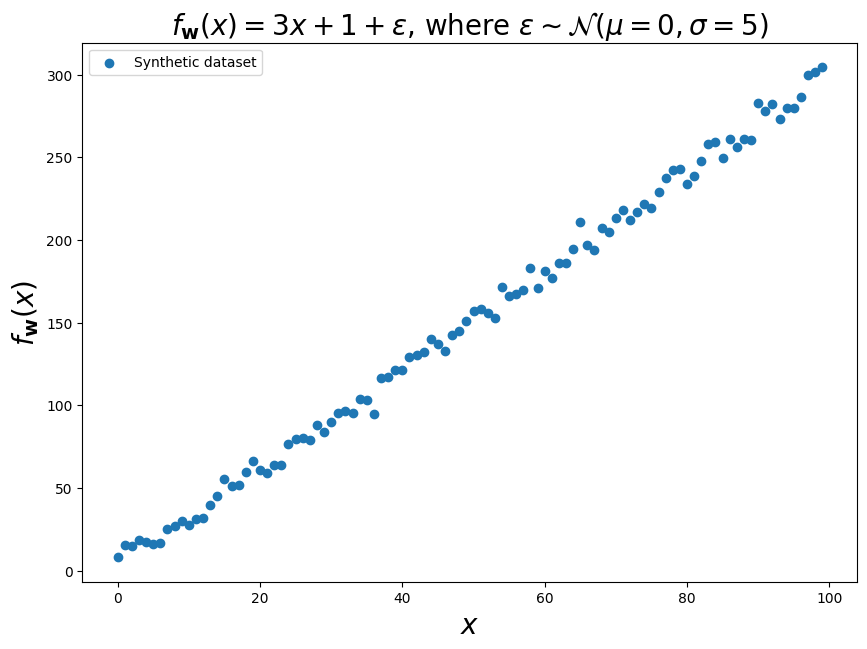

In [ ]:
# 3. Visualise the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[1]} x + {true_coeffs[0]} + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()


Se utiliza la función *train_test_split* de Scikit-learn para dividir los datos de "x" e "y" de forma aleatoria. Se establece que el 20% de los datos será para pruebas (test) y el 80% restante para entrenamiento (train). También se utiliza un parámetro llamado *random_state*, que funciona como una semilla para asegurar que la división aleatoria sea la misma cada vez que se ejecute el código.

Esto se hace ya que si se revisa con los mismos datos que se entrena no se puede evaluar de verdad, es como si te pusieran un examen pero ya sabes las preguntas.

La función *train_test_split* (Scikit Learn, 2025) utiliza los siguientes parámetros:
*   **arrays:** Una secuencia de indexables con la misma longitud (listas, arreglos de numpy, matrices, dataframes de pandas)
*   **test_size:** Número entre 0.0 y 1.0 que representa la proporción del dataset a incluir en la división de prueba.
*   **train_size:** Número entre 0.0 y 1.0 que representa la proporción del dataset a incluir en la división de entrenamiento.
*   **random_state:** Número que controla la mezcla de los datos antes de aplicar la división. Ayuda a obtener un resultado reproducible.
*   **shuffle:** Valor booleano que establece si se mezclan los datos antes de dividirlos.
*   **stratify:** Parámetro relacionado a los arreglos, si se proporciona los datos se dividen de forma estratificada.


In [ ]:
# 4. Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

Se realiza nuevamente una visualización. Son los mismos datos que antes, pero ahora se observa la división *train_test*. Esto permite verificar fácilmente que efectivamente existe una división 80-20 y confirmar que dicha división no genera un desequilibrio o bias. Por ejemplo si se hubiera dividido como x_test = x[0:19], y x_train = x[20:100], se hace la misma proporción pero con peor distribución.

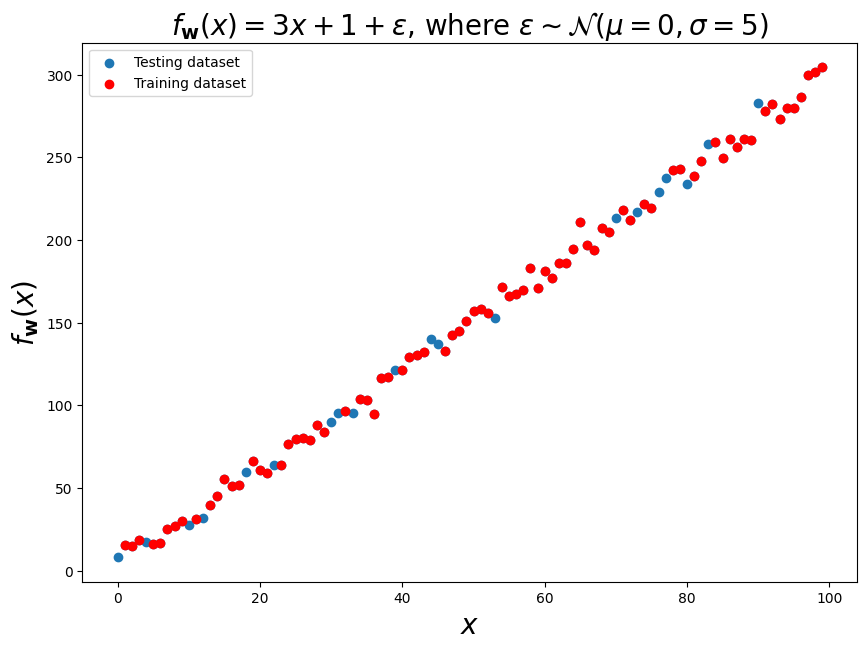

In [ ]:
# 5. Visualise the generated train and test synthetic dat sets
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[1]} x + {true_coeffs[0]} + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", fontsize=20)
plt.legend()
plt.show()

Aqui se construye el modelo. Es una sola neurona con multiples entradas de una sola variable de entrada, por eso se deja vacío el segundo espacio de *shape*. Se muestra un resumen del modelo, ahí también se muestran los parámetros a determinar con el entrenamiento.

La funcionalidad *tf.keras.Sequential* (Tensorflow, 2024) nos permite agrupar una pila lineal de capas para definir un modelo específico. Dentro del modelo podemos definir cualesquiera cantidad de capas y de diferentes tipos. En este caso estamos agregando una capa de entrada y una capa densa completamente conectada.

La capa de entrada acepta como parámetros:
*   **shape:** Una tupla de formas, sin incluir el tamaño del lote, indica que la entrada esperada será lotes de vectores de n dimensiones.
*   **batch_size:** El tamaño del lote.
*   **dtype:** String que indica el tipo de datos esperados para la entrada.
*   **sparse:** Un booleano que especifica si la entrada serán tensores dispersos.
*   **name:** String para el nombre de la capa.
*   **tensor:** Tensor existente opcional, para envolver en la capa de entrada.

La capa densa completamente conectada acepta como parámetros:
*   **units:** Número entero positivo indicando la dimensionalidad del espacio de salida.
*   **activation:** Función de activación a usar.
*   **use_bias:** Booleano que indica si la capa usa un vector de sesgo.
*   **kernel_initializer:** Inicializador de la matriz de pesos del kernel.
*   **bias_initializer:** Inicializador del vector de sesgo.
*   **kernel_regularizer:** Función de regularización aplicada a la matriz de pesos del kernel.
*   **bias_regularizer:** Función de regularización aplicada al vector de sesgo.
*   **activity_regularizer:** Función de regularización aplicada a la salida de la capa.
*   **kernel_constraint:** Función de restricción aplicada a la matriz de pesos del kernel.
*   **bias_constraint:** Función de restricción aplicada al vector de sesgo.
*   **lora_rank:** Entero opcional. Si se establece, el paso hacia adelante de la capa implementará LoRA (Low-Rank-Adaptation), lo cual puede ser útil para reducir el coste computacional del ajuste fino de capas densas de gran tamaño.

Los tensores son arreglos multi dimensionales con un tipo uniforme (llamado *dtype*). Son similares a los arreglos de numpy. Todos los tensores son inmutables como los números y cadenas de Python; no podemos actualizar el contenido de un tensor, sólo crear uno nuevo. Esta inmutabilidad ayuda a mantener la coherencia durante procesos de entrenamiento y ejecución de modelos (Tensorflow, 2024).

Existen diferentes tipos de capas de redes neuronales. En este caso se usa dos tipos de capas: una capa de entrada y una capa densamente conectada. Una capa de entrada define la forma de los datos de entrada, en este caso, un sólo valor numérico. Por otro lado, una capa densamente conectada es aquella que tiene todas las neuronas conectadas con todos los elementos anteriores (Navarro, S., 2024).

In [ ]:
# 6. Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(1,)),
      tf.keras.layers.Dense(1)
    ])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

None


Aqui se compila el modelo, primero definiendo el optimizador *Adam*. Se modificó el parámetro de *learning_rate* que define cuánto cambian los valores en cada iteración del entrenamiento. Para determinar el parámetro a minimizar se establece la función de pérdida como la *mean-square-error*, la suma de los cuadrados de las distancias entre los puntos reales y los predichos.

Tensorflow-Keras tiene una gran variedad de optimizadores, entre los que se incluyen Adadelta, Adafactor, Adagrad, Adam, AdamW, Adamax, Ftrl, Lion, Nadam, RMSprop y SGD. Todos estos algoritmos utilizan diferentes parámetros, pero coinciden en que es posible ajustar el *learning_rate* según lo que necesitemos.

El algoritmo Adam (Adaptative Moment Estimation) es uno de los optimizadores más utilizados en el aprendizaje automático debido a múltiples ventajas: su velocidad y eficiencia, manejo de gradientes dispersos (que ocurren en conjuntos de datos en los que las características aparecen con poca frecuencia), ritmos de aprendizaje adaptables y la necesidad mínima de ajustar los hiperparámetros, lo que simplifica el proceso de desarrollo del modelo (Wei D., 2024).

In [ ]:
# 7. Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.2)
model.compile(optimizer=opt, loss='mse')

Se establece el *early_stopping*, el cual frena el entrenamiento si el parámetro de monitoreo (en este caso la pérdida de validación), no cambia por lo menos por 0.001 por 20 iteraciones. Cuando lo frena regresa los parámetros a los de mejor rendimiento.

La función de **EarlyStopping** de Tensorflow-Keras (Tensorflow, 2024) utiliza como parámetros:
*   **monitor:** Cantidad a ser monitoreada. Valor por defecto: "val_loss".
*   **min_delta:** Cambio mínimo en la cantidad monitoreada para calificar como una mejora.
*   **patience:** Número de épocas sin mejorar tras las cuales se detendrá el entrenamiento.
*   **verbose:** Entero entre 0 y 1. El modo 0 es silencioso, y el modo 1 muestra mensajes cuando la llamada de retorno realiza una acción.
*   **mode:** En modo "min", el entrenamiento parará cuando la cantidad monitoreada haya parado de disminuir. En modo "max" el entrenamiento parará cuando la cantidad monitoreada ha parado de incrementar. En modo "auto", la dirección se deduce automáticamente del nombre de la cantidad supervisada.
*   **baseline:** Valor de referencia de la cantidad controlada.
*   **restore_best_weights:** Booleano que indica si se restauran los pesos del modelo a partir de la época con el mejor valor de la cantidad controlada.
*   **start_from_epoch:** Número de épocas a esperar antes de comenzar a monitorear mejoras.



In [ ]:
# 8. Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=6,
    restore_best_weights=True
)

Se entrena el modelo con los siguientes parámetros:
* **x:** los datos de entrada.
* **y:** los datos de salida.
* **epochs:** se establece un máximo de épocas de 3000.
* **batch_size:** calcula los parámetros utilizando bloques de 20 datos.
* **validation_split:** toma un set del 10% de los datos para evaluar el rendimiento del modelo en cada iteración.
* **verbose:** sólo sirve para el formato de la información que da durante el entrenamiento
* **callback:** parámetro como *early_stopping*, explicado en la sección anterior

Se mide el tiempo de entrenamiento con las funciones de *time*, tomando la diferencia entre el tiempo actual antes del entrenamiento y posterior a este.

In [ ]:
# 9. Train the model
start_time = time.time()
model.fit(x_train, y_train, epochs=3000, batch_size=20, validation_split=0.10, verbose=1, callbacks=[early_stopping])
print(f"\nElapsed time: {time.time() - start_time} sec")


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 53.3337 - val_loss: 24.7480
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 55.7346 - val_loss: 66.4595
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 44.4071 - val_loss: 3.2166
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 32.2804 - val_loss: 9.3838
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 32.7591 - val_loss: 17.0879
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 28.3568 - val_loss: 4.1715
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 31.1184 - val_loss: 20.1832
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 28.8166 - val_loss: 5.5648
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 33.8724 - val_loss: 11.9386

Elapsed time: 2.789667844772339 sec


Utilizamos los sets de prueba divididos previamente para evaluar el rendimiento del modelo con la función evaluate con los siguientes parámetros:
* **x:** los datos de prueba de entrada, *x_test*.
* **y:** los datos de prueba de salida, *y_test*.

Ya que se había establecido el *mse* como la función de pérdida, esta es la forma del resultado.

In [ ]:
# 10. Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'\nTest Loss: {loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 28.9366

Test Loss: 28.936573028564453


Se obtienen los pesos de la primera capa del modelo haciendo uso de ciertas funciones de la librería Keras de Tensorflow:

* model.layers[0]: accede a la primera capa de la red neuronal.
* get_weights(): recupera los pesos y sesgos de la capa en forma de una lista de matrices NumPy. La primera matriz representa los pesos sinápticos y la segunda los términos de sesgo (Keras, 2023).

 En base a la base de datos generada sus valores deberían ser cercanos a 3 y 1.

In [ ]:
# 10. Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Bias [w0]: {weights[1]}")

Weights [w1]: [[3.0043178]]
Bias [w0]: [2.975074]


Como se hizo dentro del evaluate aquí se ingresan los datos de *x_test* en el modelo y se guardan los resultados en *y_pred_test*.

La función *predict* genera predicciones de salida para las muestras de entrada. Acepta como parámetros:
*   **x:** Datos de entrada.
*   **batch_size:** Número de muestras por lote de cálculo.
*   **verbose:** Controla la cantidad de información de salida a mostrar
*   **steps:** Total de pasos (lotes de muestras) para dibujar antes finalizar la ronda de predicción.
*   **callbacks:** Lista de callbacks a aplicar durante la predicción.

Un callback es un objeto que realiza ciertas acciones en varias etapas del entrenamiento (Keras, 2024).



In [ ]:
# 11. Make predictions
y_pred_test = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Se grafican ahora los datos de *train* como puntos en azul igual que antes, pero ahora se muestra el resultado del modelo con los datos de *test*.

De nuevo es una buena práctica visualizar el resultado ya que es más fácil y rápido de comprender e interpretar el rendimiento. En este caso podemos observar que se genera satisfactoriamente la línea recta esperada que se ajusta a los datos, reduciendo el error de predicción y confirmando la efectividad del modelo entrenado.

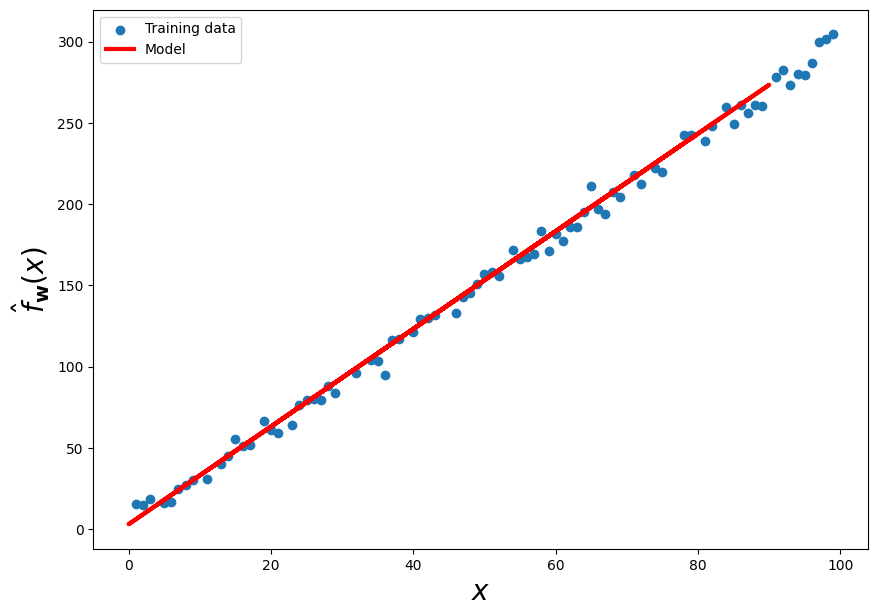

In [ ]:
# 12. Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_test, y_pred_test, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel("$\hat{f}_{\mathbf{w}}(x)$", fontsize=20)
plt.legend()
plt.show()

## Conclusiones personales

**Max Kevin Solís Meester**

El análisis de un sólo perceptrón como punto de partida para comprender las redes neuronales es una estrategia altamente efectiva, ya que permite descomponer y examinar los principios fundamentales de esta tecnología. Al centrarse en su estructura básica, se pueden visualizar con claridad tanto sus capacidades como sus limitaciones, lo que proporciona un marco de referencia sólido para la comprensión de arquitecturas más complejas. Una de las limitaciones más evidentes de un perceptrón simple es su dependencia de múltiples iteraciones de entrenamiento para ajustar sus parámetros, en contraste con métodos analíticos como la regresión lineal, los cuales pueden ofrecer soluciones exactas con menor costo computacional. Sin embargo, la gran ventaja de los perceptrones y, en general, de las redes neuronales, radica en su flexibilidad y capacidad de adaptación para modelar relaciones complejas en los datos. El verdadero potencial de los modelos neuronales se manifiesta cuando se combinan múltiples perceptrones en diversas configuraciones y estructuras, ajustando parámetros y aplicando estrategias de optimización que permiten mejorar su desempeño.

La experimentación con hiperparámetros es una herramienta esencial en este proceso, ya que puede reducir significativamente el tiempo de entrenamiento sin comprometer la calidad de los resultados. En este sentido, uno de los hallazgos más relevantes fue la optimización del número de épocas necesarias para alcanzar una convergencia efectiva. Se logró reducir de 3000 épocas a menos de 30 simplemente ajustando algunos hiperparámetros clave, lo que demuestra la importancia de una afinada calibración del modelo.

Entre las técnicas más útiles en la optimización del entrenamiento se encuentra el ajuste del mecanismo de early stopping, que previene el sobreentrenamiento al detener el proceso cuando la mejora del modelo deja de ser significativa. En particular, se observó que al reducir la paciencia y aumentar el parámetro min_delta, se eliminaban iteraciones innecesarias, aunque el progreso por época seguía siendo relativamente lento. Para contrarrestar este efecto, se incrementó la tasa de aprendizaje (learning rate), lo que permitió acelerar la convergencia del modelo y, combinado con early stopping, reducir el tiempo total de entrenamiento sin perder precisión en las predicciones. Este tipo de estrategias resultan especialmente valiosas en escenarios donde el tiempo de entrenamiento es un cuello de botella en el desarrollo de proyectos de investigación o aplicaciones prácticas.

El ejercicio de ajuste y optimización de hiperparámetros no solo proporciona beneficios en términos de eficiencia computacional, sino que también brinda una comprensión más profunda del impacto de cada uno de estos parámetros en el comportamiento del modelo. A través de la experimentación sistemática, es posible identificar combinaciones que maximizan el rendimiento sin incurrir en costos computacionales innecesarios. Este conocimiento es fundamental para el diseño de redes neuronales más avanzadas, en las que la selección adecuada de hiperparámetros puede marcar la diferencia entre un modelo funcional y uno que no logra una generalización efectiva, o entre uno que tome 2 horas y otro que tome 2 minutos.

En conclusión, comenzar el estudio de las redes neuronales desde un perceptrón simple permite desarrollar una base conceptual sólida y facilita la exploración de estrategias para mejorar la eficiencia del entrenamiento. La combinación de técnicas de optimización, como el ajuste del early stopping y el incremento del learning rate, demuestra ser una metodología efectiva para reducir el tiempo de cómputo sin sacrificar precisión. Estas estrategias son fundamentales en la implementación de modelos más complejos, permitiendo abordar problemas que no pueden resolverse de manera analítica o cuyo tratamiento sería ineficiente mediante métodos tradicionales.

**Víctor Yahir Ramírez Martínez**

En este notebook utilizamos algunas de las librerías más populares para el aprendizaje automático en Python: NumPy para cálculos numéricos, TensorFlow para construcción de modelos de machine learning, Matplotlib para visualización de datos, y Scikit-Learn para preprocesamiento y evaluación de modelos.

Generamos una serie de datos sintéticos que simulan el comportamiento de una función lineal, añadiendo ruido aleatorio mediante una distribución normal con media 0 y desviación estándar de 5. Esto nos permite crear un conjunto de datos efectivo para entrenar y evaluar un modelo de machine learning.

Desarrollamos un modelo de red neuronal simple para realizar una regresión lineal usando TensorFlow-Keras. Exploramos la arquitectura de redes neuronales, utilizando una capa de entrada para recibir los datos y una capa densa completamente conectada, donde cada neurona se conecta con todas las neuronas de la capa anterior.

Durante el entrenamiento del modelo, utilizamos el algoritmo optimizador Adam, el cual es conocido por su eficiencia y rapidez en el proceso de desarrollo de modelos de machine learning. Experimentamos con diferentes valores de learning rate, observando que entre más alta la tasa de aprendizaje, se reducen el número de épocas necesarias para entrenar el modelo, aunque con la precaución de no exceder un valor que pueda provocar la divergencia del modelo.

Seleccionamos el error cuadrático medio (Mean Squared Error) como función de pérdida para optimizar durante el entrenamiento, lo que nos permite evaluar la precisión de las predicciones del modelo. Así mismo, implementamos una estrategia de early stopping para detener el entrenamiento cuando el rendimiento del modelo deja de mejorar por cierta cantidad después de un número determinado de épocas, optimizando así los recursos computacionales.

Finalmente, evaluamos el desempeño del modelo comparando los pesos calculados para el intercepto y la pendiente con los coeficientes originales de la función lineal que generó los datos sintéticos. Observamos que el error cuadrático medio entre las predicciones y los valores reales era aproximadamente 28.12. Mediante una gráfica, confirmamos que  la distribución y comportamiento de los datos predichos es muy similar a los datos originales.

En conclusión, esta actividad nos permitió comprender los fundamentos del entrenamiento de redes neuronales para regresión lineal, observando la importancia de la selección de hiperparámetros, las estrategias de optimización y entrenamiento, así como la evaluación del modelo.


## Referencias

1.   GeeksforGeeks. (2024, December 5). Python random.seed( ) method. GeeksforGeeks. https://www.geeksforgeeks.org/random-seed-in-python/
2.   Keras. (2025). Keras documentation: Callbacks API. https://keras.io/api/callbacks/
3.   Matplotlib. (2024). Matplotlib 3.5.3 documentation. https://matplotlib.org/3.5.3/api/toolkits/axisartist.html
4.   Navarro, S. (2024, November 14). Tipos de capas de red neuronal convolucional. KeepCoding Bootcamps. https://keepcoding.io/blog/tipos-capas-red-neuronal-convolucional/
5.   NumPy. (2024). NumPy documentation. https://numpy.org/doc/stable/
6.   Python.org. (2022). Python 3.13.1 Documentation. https://docs.python.org/3/
7.   Scikit Learn. (2025). API reference. Scikit-learn. https://scikit-learn.org/stable/api/index.html#
8.   Tensorflow. (2024). TensorFlow Core. TensorFlow Core. https://www.tensorflow.org/guide
9.   Wei, D. (2024, January 30). Demystifying the Adam Optimizer in machine learning. Medium. https://medium.com/@weidagang/demystifying-the-adam-optimizer-in-machine-learning-4401d162cb9e



In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!jupyter nbconvert --to PDF "simple-linear-regression.ipynb"

[NbConvertApp] WARNING | pattern 'simple-linear-regression.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
